## Softmax Regression Algorithm

Softmax Regression Algorithm is generalisation of Logistic Regression Algorithm.

$$ Z_j = \vec w_j \cdot \vec x + b_j  \ \ \text{Where, j=1,2,3,4....N}$$

Then, 
$$ a_j = \frac{e^{z_j}}{\sum_{k=1}^N e^{z_j}}$$





## Loss Function

We know,

$$ a_1 = \frac{e^{z_1}}{e^{z_1}+e^{z_2}+\cdot \cdot \cdot + e^{z_N}} = P(y=1| \vec X)$$
$$\cdot \cdot$$
$$ a_N = \frac{e^{z_N}}{e^{z_1}+e^{z_2}+\cdot \cdot \cdot + e^{z_N}} = P(y=N| \vec X) $$


So, the Loss function is, 



The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


## NN with multi class classification

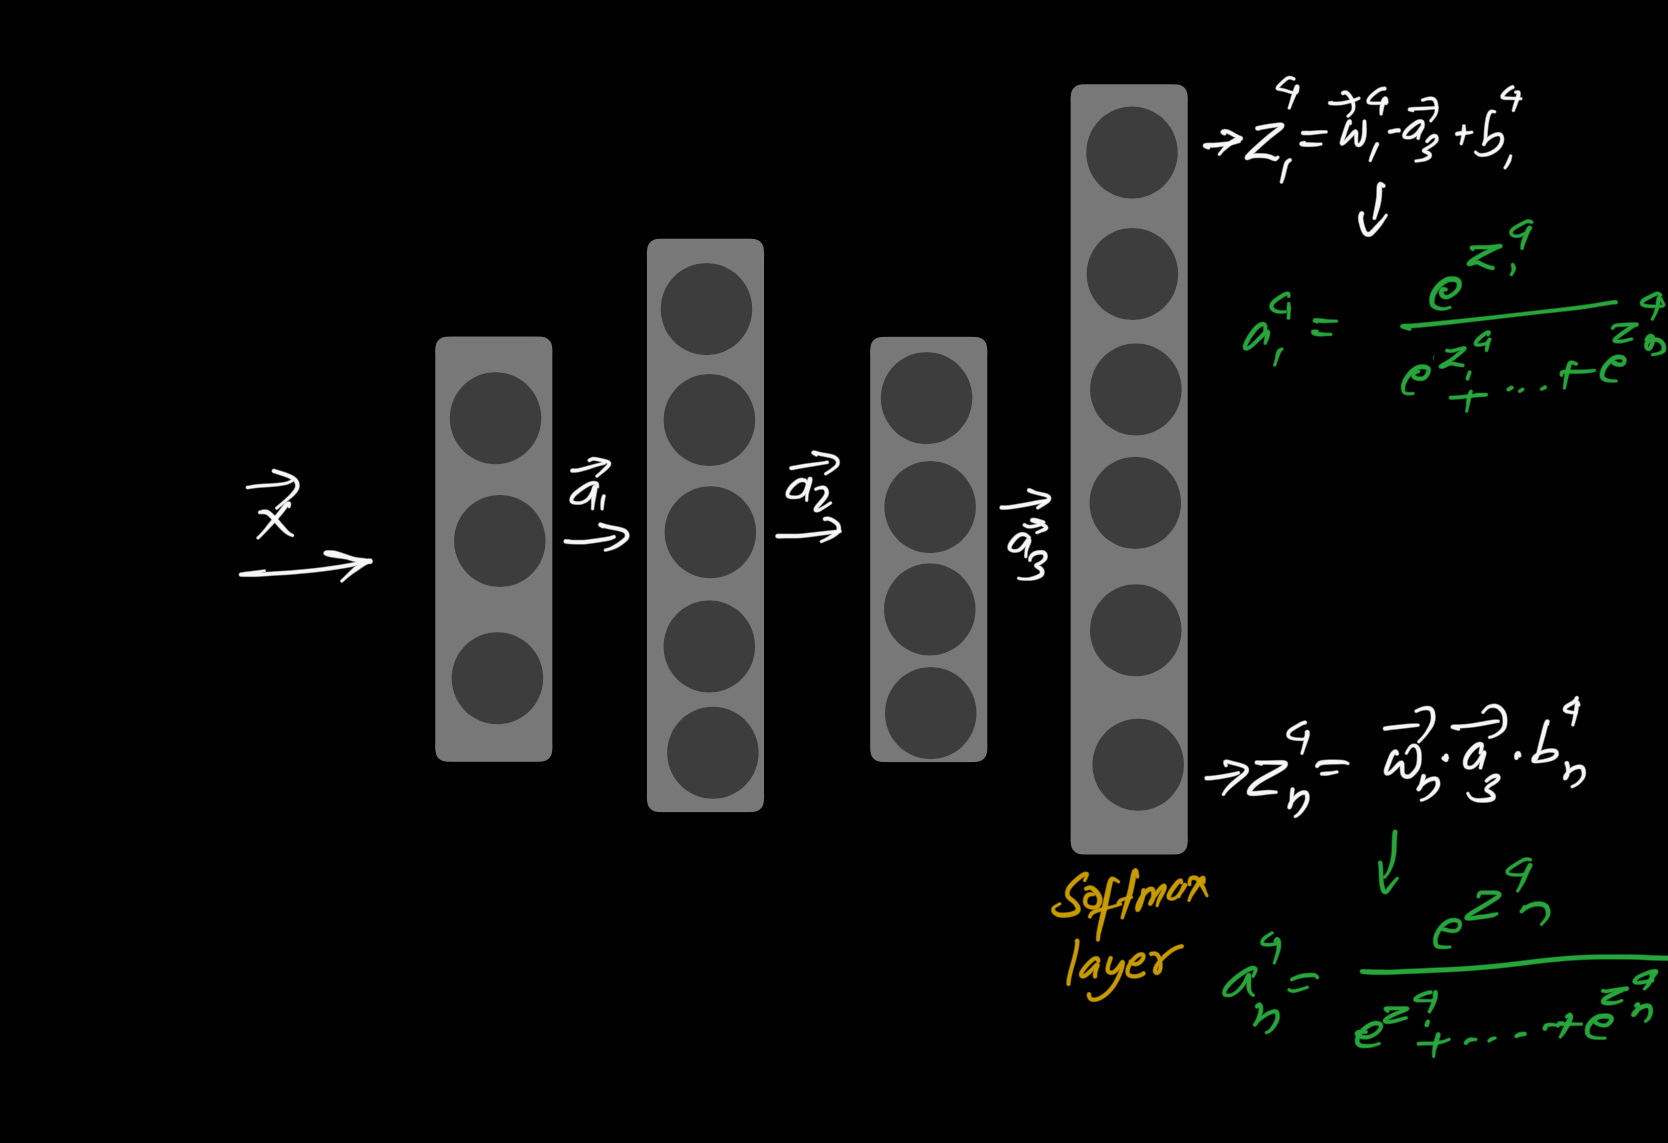

## SoftMax Using TensorFlow 

```python
    import tensorflow as tf
    from tensorflow.keras import Sequential
    from tensorflow.keras.layers import Dense
    from tensorflow.keras.losses import SparseCategoricalCrossentropy
    
    model = Sequential([
        Dense(units=25, activation="relu"),
        Dense(units=15, activation="relu"),
        Dense(units=10, activation="linear")
    ])

    model.compile(...., loss=SparseCategoricalCrossentropy(from_logits=True))

    
    model.fit(X,y, epochs=100)

    
    logits = model(X)

    
    f_x = tf.nn.softmax(logits)
```

# Avoiding Round-Off Errors in TensorFlow Neural Network

When working with floating-point numbers (decimals) in computers, **round-off errors** can occur. This happens because computers can't represent every decimal number exactly, which may cause small mistakes that accumulate and affect calculations, especially when dealing with very small or very large numbers.

In neural networks, we often need to compute **probabilities** (numbers between 0 and 1), and sometimes, when calculating these from **logits** (raw outputs of the network), round-off errors can happen if the values are too large or small.

## Solution in the Code

### 1. **Logits Instead of Probabilities:**
   - The model’s output layer (`Dense(units=10, activation="linear")`) does not apply an activation function, so it produces **raw numbers**, called **logits**.
   - **Why is this helpful?** If we tried to directly compute probabilities from these logits using something like softmax (a function to turn logits into probabilities), we could end up with numbers that are too large or too small, which could cause **round-off errors**.

### 2. **Loss Function with `from_logits=True`:**
   - In the loss function `SparseCategoricalCrossentropy(from_logits=True)`, we are telling TensorFlow that the values we're passing in are **logits**, not probabilities.
   - **Why is this helpful?** When you tell TensorFlow these are logits, it internally applies **softmax** in a way that avoids potential numerical instability (like overflow or underflow). This ensures that the softmax operation is done in a stable manner, preventing round-off errors.

### 3. **Softmax in a Numerically Stable Way:**
   - The `softmax` function converts logits into probabilities. Normally, if we applied softmax directly, we might run into issues if the logits are too large or small.
   - **How does TensorFlow help?** TensorFlow uses a technique where it subtracts the maximum value from the logits before applying softmax. This prevents large values that could cause overflow errors or very small values that might result in underflow, both of which could lead to inaccuracies during calculation.
   
   In short, TensorFlow implements softmax in a way that avoids numerical instability and ensures accurate computations.

## Summary

By using **logits** and telling TensorFlow to compute the softmax internally (instead of applying it manually), we ensure that the calculations are **numerically stable** and free from round-off errors.

- **Logits** are raw values (not probabilities), and using them directly helps prevent issues with numerical stability.
- TensorFlow applies **softmax** in a way that avoids large or small numbers causing problems during computation.
- By using the `from_logits=True` flag, we make sure everything is handled correctly internally, ensuring smooth training without round-off errors.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

In [20]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

## The obvious Method

The model below is implemented with the softmax as an activation in the final Dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities. 

In [21]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
 1/63 [..............................] - ETA: 9s - loss: 1.7840

2025-01-18 14:40:53.177704: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


63/63 [==============================] - 0s 295us/step - loss: 1.0032
Epoch 2/10
63/63 [==============================] - 0s 236us/step - loss: 0.4223
Epoch 3/10
63/63 [==============================] - 0s 235us/step - loss: 0.2073
Epoch 4/10
63/63 [==============================] - 0s 236us/step - loss: 0.1174
Epoch 5/10
63/63 [==============================] - 0s 232us/step - loss: 0.0816
Epoch 6/10
63/63 [==============================] - 0s 231us/step - loss: 0.0646
Epoch 7/10
63/63 [==============================] - 0s 231us/step - loss: 0.0552
Epoch 8/10
63/63 [==============================] - 0s 233us/step - loss: 0.0488
Epoch 9/10
63/63 [==============================] - 0s 232us/step - loss: 0.0444
Epoch 10/10
63/63 [==============================] - 0s 231us/step - loss: 0.0405


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [24]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 292us/step
[[2.4500536e-03 4.0323348e-03 9.6880251e-01 2.4715101e-02]
 [9.9653935e-01 2.6873427e-03 7.4461027e-04 2.8767658e-05]]
largest value 0.99999857 smallest value 5.3764904e-10


More numerical stable and accurate results can be obtained if the softmax and loss are combined during training.   This is enabled by the 'preferred' organization shown here.


## Preffered Method

In the preferred organization the final layer has a linear activation. For historical reasons, the outputs in this form are referred to as *logits*. The loss function has an additional argument: `from_logits = True`. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

In [25]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)
        

Epoch 1/10
63/63 [==============================] - 0s 278us/step - loss: 0.9631
Epoch 2/10
63/63 [==============================] - 0s 238us/step - loss: 0.3612
Epoch 3/10
63/63 [==============================] - 0s 224us/step - loss: 0.1778
Epoch 4/10
63/63 [==============================] - 0s 222us/step - loss: 0.1090
Epoch 5/10
63/63 [==============================] - 0s 223us/step - loss: 0.0805
Epoch 6/10
63/63 [==============================] - 0s 222us/step - loss: 0.0673
Epoch 7/10
63/63 [==============================] - 0s 226us/step - loss: 0.0597
Epoch 8/10
63/63 [==============================] - 0s 229us/step - loss: 0.0545
Epoch 9/10
63/63 [==============================] - 0s 232us/step - loss: 0.0504
Epoch 10/10
63/63 [==============================] - 0s 228us/step - loss: 0.0457


#### Output Handling
Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 

In [26]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 257us/step
two example output vectors:
 [[-3.155145   -2.0087926   3.189436   -0.23115963]
 [ 8.406351    3.135059   -0.5002023  -2.2606757 ]]
largest value 13.898575 smallest value -12.293074


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax]

In [27]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.6887311e-03 5.3139171e-03 9.6156108e-01 3.1436276e-02]
 [9.9473214e-01 5.1099099e-03 1.3478428e-04 2.3177970e-05]]
largest value 0.9999988 smallest value 5.7107647e-09
